### QATAR WORLD CUP 2022 ANALYSIS

### Step 0 - Imports and Reading Data

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 - Data Understanding

In [3]:
df = pd.read_csv('Fifa_world_cup_matches.csv')
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [4]:
df.shape

(64, 88)

In [5]:
df.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

In [6]:
df.dtypes

team1                                object
team2                                object
possession team1                     object
possession team2                     object
possession in contest                object
                                      ...  
own goals team2                       int64
forced turnovers team1                int64
forced turnovers team2                int64
defensive pressures applied team1     int64
defensive pressures applied team2     int64
Length: 88, dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of             team1         team2 possession team1 possession team2  \
0           QATAR       ECUADOR              42%              50%   
1         ENGLAND          IRAN              72%              19%   
2         SENEGAL   NETHERLANDS              44%              45%   
3   UNITED STATES         WALES              51%              39%   
4       ARGENTINA  SAUDI ARABIA              64%              24%   
..            ...           ...              ...              ...   
59        ENGLAND        FRANCE              54%              36%   
60      ARGENTINA       CROATIA              34%              54%   
61         FRANCE       MOROCCO              34%              55%   
62        CROATIA       MOROCCO              45%              45%   
63      ARGENTINA        FRANCE              46%              40%   

   possession in contest  number of goals team1  number of goals team2  \
0                     8%                      0                

In [8]:
# Check for any null values
df.isnull().sum()

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [10]:
# Check for any duplicated values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool

### Step 2 - Data Preparation


<!--  TODO - Pick the features we want to analyse, then drop everything else? -->

Let's identify some of the data points which look interesting

- Possession - columns C and D
- Number of Goals (scored) - columns F and G
- Number of Attempts - so we can see calculate conversion (feature engineering?) clumns K and L
- Goals Conceded - columns M and N
<!-- - Assists? (indication of teamplay) -->
<!-- - Yellow Cards/ Red Cards -->
<!-- - Passes - pass completion - FEATURE - can compute accuracy -->




### Step 3: Feature Understanding

### Goals

In [27]:
team_goals = df.groupby('team1')['number of goals team1'].sum().reset_index()
team_goals.columns = ['Team', 'Goals Scored']


team_goals['Goals Scored'] += df.groupby('team2')['number of goals team2'].sum().reset_index()['number of goals team2']

In [28]:
# Check to see table creation worked
team_goals.head()

,Team,Goals Scored
0,ARGENTINA,15
1,AUSTRALIA,4
2,BELGIUM,1
3,BRAZIL,8
4,CAMEROON,4


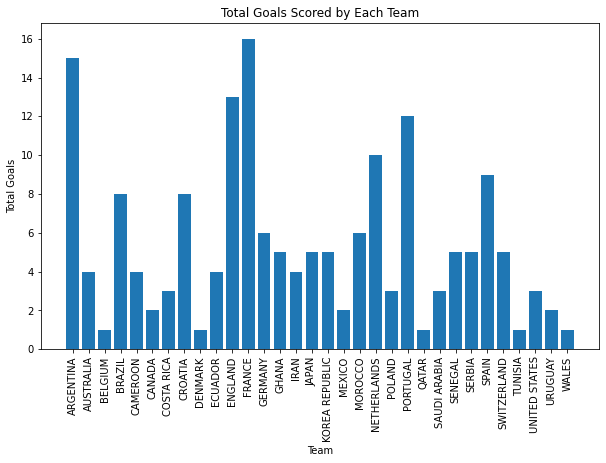

In [29]:
plt.figure(figsize=(10,6))
plt.bar(team_goals['Team'], team_goals['Goals Scored'])
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.xticks(rotation=90)
plt.show()

# Lets have this as initial sort of analysis so the working looks good, and then convert the modified pandas stuff to .csvs and make a dashboard visualisation with it



# Team | Goals Scored | Goals Conceded | Games Played 

In [20]:
#Find the number of games played by each team
games_played = pd.concat([df['team1'], df['team2']]).value_counts().reset_index()
games_played.columns = ['Team', 'Games Played']

games_played.head()

,Team,Games Played
0,FRANCE,7
1,MOROCCO,7
2,ARGENTINA,7
3,CROATIA,7
4,ENGLAND,5


In [21]:
# Export to csv for usage in Tableau
# games_played.to_csv('games_played.csv', index=False)

### Goals Conceded

In [30]:
goals_conceded = df.groupby('team1')['conceded team1'].sum().reset_index()
goals_conceded.columns = ['Team', 'Goals Conceded']

goals_conceded['Goals Conceded'] += df.groupby('team2')['conceded team2'].sum().reset_index()['conceded team2']

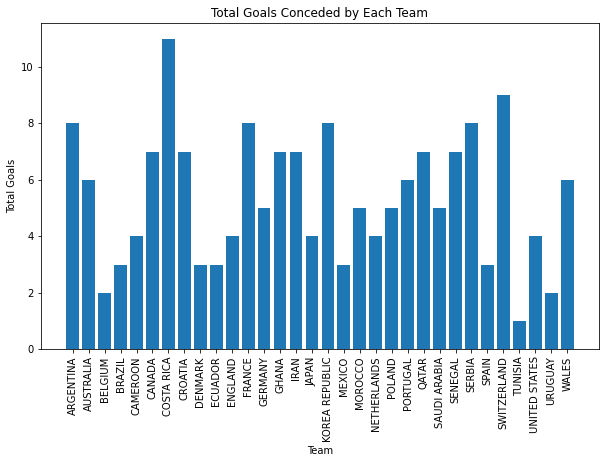

In [31]:
plt.figure(figsize=(10,6))
plt.bar(goals_conceded['Team'], goals_conceded['Goals Conceded'])
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Conceded by Each Team')
plt.xticks(rotation=90)
plt.show()

### Possession (TO FIX)

In [49]:
average_possession_df = pd.DataFrame()

teams = pd.concat([df['team1'], df['team2']]).unique()

# Calculate the average possession for each team
for team in teams:
    team_possession = df[(df['team1'] == team) | (df['team2'] == team)]
    average_possession = team_possession[['possession team1', 'possession team2']].mean().mean()
    average_possession_df = average_possession_df.append({'Team': team, 'Average Possession': average_possession}, ignore_index=True)

# Display the table of average possession for each team
average_possession_df.head(32)

,Average Possession,Team
0,0.456667,QATAR
1,0.452000,ENGLAND
2,0.438750,SENEGAL
3,0.443750,UNITED STATES
4,0.440000,ARGENTINA
5,0.433333,DENMARK
6,0.425000,MEXICO
7,0.442857,FRANCE
8,0.443571,MOROCCO
9,0.438333,GERMANY


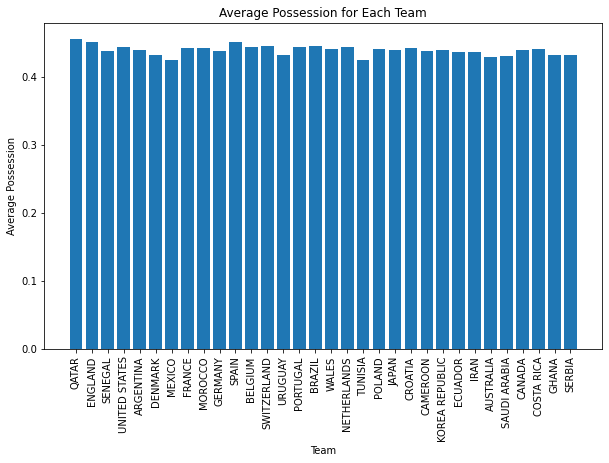

In [51]:
plt.figure(figsize=(10,6))
plt.bar(average_possession_df['Team'], average_possession_df['Average Possession'])
plt.xlabel('Team')
plt.ylabel('Average Possession')
plt.title('Average Possession for Each Team')
plt.xticks(rotation=90)
plt.show()

### ATTEMPTS